In [94]:
import numpy as np
import pandas as pd

# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_colwidth", None)

In [95]:
cleaned_properties = pd.read_csv("/content/drive/MyDrive/DATASET_ML/gurgaon_properties_cleaned_v1.csv")
cleaned_properties.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']"


In [96]:
# check for the duplicated.
cleaned_properties.duplicated().sum()

122

In [97]:
# Now, In this notebooks, feature engineering will be performs on the areaWithType Columns first then rest of the other columns.

## **1. areaWithType.**

In [98]:
cleaned_properties['areaWithType'].head(5)

,areaWithType
0,Super Built up area 1081(100.43 sq.m.)Carpet a...
1,Carpet area: 1103 (102.47 sq.m.)
2,Carpet area: 58141 (5401.48 sq.m.)
3,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...
4,Super Built up area 1995(185.34 sq.m.)Built Up...


In [99]:
cleaned_properties[['price', 'area', 'areaWithType']].head(5)

,price,area,areaWithType
0,0.82,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...
1,0.95,1105.0,Carpet area: 1103 (102.47 sq.m.)
2,0.46,58228.0,Carpet area: 58141 (5401.48 sq.m.)
3,0.32,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...
4,1.60,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...


In [100]:
cleaned_properties['areaWithType'].values

array(['Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.)',
       'Carpet area: 1103 (102.47 sq.m.)',
       'Carpet area: 58141 (5401.48 sq.m.)', ...,
       'Super Built up area 735(68.28 sq.m.)',
       'Plot area 610(510.04 sq.m.)',
       'Super Built up area 1950(181.16 sq.m.)Built Up area: 1845 sq.ft. (171.41 sq.m.)Carpet area: 1530 sq.ft. (142.14 sq.m.)'],
      dtype=object)

In [101]:
import re

# First fetch the super-built up area.
def get_super_built_up_area(text):
    super_built_up_area = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if super_built_up_area:
        return float(super_built_up_area.group(1))
    return None

# Now, Fetch the Built-Up area or Carpet area.
def get_built_up_area(text, area_type):
    built_up_area_carpet_area = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if built_up_area_carpet_area:
        return float(built_up_area_carpet_area.group(1))
    return None

# Now, Fetch the Plot area.
def get_plot_area(text):
    plot_area = re.search(r'Carpet area (\d+\.?\d*)', text)
    if plot_area:
        return float(plot_area.group(1))

# Thsi function checks if the area is provided in sq.m. and converts it to sqft if needed.
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        # implementing the conversion factor from sq.m. to sqft.
        return sq_m_value * 10.7639
    return area_value

In [102]:
# Now, Extract the Super Built up area and convert to sqft if needed.
cleaned_properties['super_built_up_area'] = cleaned_properties['areaWithType'].apply(get_super_built_up_area)
cleaned_properties['super_built_up_area'] = cleaned_properties.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Now, Extract the Built Up area and convert to sqft if needed.
cleaned_properties['built_up_area'] = cleaned_properties['areaWithType'].apply(lambda x: get_built_up_area(x, 'Built Up area'))
cleaned_properties['built_up_area'] = cleaned_properties.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed.
cleaned_properties['carpet_area'] = cleaned_properties['areaWithType'].apply(lambda x: get_built_up_area(x, 'Carpet area'))
cleaned_properties['carpet_area'] = cleaned_properties.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [103]:
cleaned_properties[['price', 'property_type', 'areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(10)

,price,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area
3769,1.00,flat,Super Built up area 1100(102.19 sq.m.),1100.0,NaN,NaN
91,1.15,flat,Super Built up area 1980(183.95 sq.m.)Built Up...,1980.0,1350.0,1308.0
872,1.90,flat,Super Built up area 2727(253.35 sq.m.)Built Up...,2727.0,2500.0,2250.0
1617,0.95,flat,Super Built up area 1875(174.19 sq.m.),1875.0,NaN,NaN
3294,3.60,flat,Carpet area: 3020 (280.57 sq.m.),NaN,NaN,3020.0
2212,0.56,flat,Carpet area: 650 (60.39 sq.m.),NaN,NaN,650.0
476,1.50,flat,Super Built up area 1811(168.25 sq.m.)Carpet a...,1811.0,NaN,1560.0
3064,0.92,flat,Built Up area: 1750 (162.58 sq.m.)Carpet area:...,NaN,1750.0,1600.0
3190,1.36,flat,Built Up area: 1535 (142.61 sq.m.),NaN,1535.0,NaN
1940,2.50,flat,Built Up area: 2244 (208.47 sq.m.)Carpet area:...,NaN,2244.0,1800.0


In [104]:
cleaned_properties.duplicated().sum()

122

In [105]:
# Filters out the rows with no null values, and selecting the subsets of the columns.
cleaned_properties[~((cleaned_properties['super_built_up_area'].isnull())| (cleaned_properties['built_up_area'].isnull()) | (cleaned_properties['carpet_area'].isnull()))][['price','property_type', 'area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].shape

(534, 7)

Only 534 rows are there with no null values.

In [106]:
# Filtering the column -> areaWithTypes with `Plot` keyword if present in that columns.

cleaned_properties[cleaned_properties['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
15,1.2,house,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq...,NaN,846.0,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [107]:
cleaned_properties.isnull().sum().sort_values(ascending=False)

,0
built_up_area,2616
super_built_up_area,1888
carpet_area,1859
facing,1105
furnishDetails,981
features,635
nearbyLocations,177
floorNum,19
price,18
price_per_sqft,18


In [108]:
# Filtering all the NaN values from specific mentioned columns.
all_nan_df = cleaned_properties[((cleaned_properties['super_built_up_area'].isnull()) & (cleaned_properties['built_up_area'].isnull()) & (cleaned_properties['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [109]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN


In [110]:
# Now, get the index of all the nan values.
all_nan_index = cleaned_properties[((cleaned_properties['super_built_up_area'].isnull()) & (cleaned_properties['built_up_area'].isnull()) & (cleaned_properties['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index
all_nan_index

Index([   9,   10,   19,   25,   26,   28,   29,   31,   38,   40,
       ...
       3713, 3716, 3743, 3762, 3768, 3783, 3791, 3794, 3799, 3801],
      dtype='int64', length=546)

In [111]:
# Function to extract plot area from `areaWithType` column.
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [112]:
# Update the Original DataFrame.
# guraon_properties.update(filtered)

In [113]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
19,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
25,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
26,7.00,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.00,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,Plot area 1900(176.52 sq.m.),NaN,1900.00,NaN
3791,6.44,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
3794,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,338.00,NaN
3799,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN


In [114]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
19,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
25,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
26,7.00,house,2475.0,Plot area 275(229.94 sq.m.),NaN,2475.00,NaN
...,...,...,...,...,...,...,...
3783,2.50,house,1900.0,Plot area 1900(176.52 sq.m.),NaN,1900.00,NaN
3791,6.44,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
3794,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,3042.00,NaN
3799,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN


In [115]:
# update the original dataframe
cleaned_properties.update(all_nan_df)

In [116]:
cleaned_properties.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [117]:
cleaned_properties.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0


### **2. additionalRoom.**

In [118]:
cleaned_properties['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1587
servant room,705
study room,250
others,225
pooja room,165
...,...
"servant room,pooja room,store room,study room",1
"store room,servant room,study room,pooja room",1
"servant room,pooja room,study room",1


In [119]:
# List of the new columns to be created.
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    cleaned_properties[col] = cleaned_properties['additionalRoom'].str.contains(col).astype(int)

In [120]:
cleaned_properties.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2326,"pooja room,store room",0,0,1,1,0
3486,pooja room,0,0,0,1,0
1900,store room,0,0,1,0,0
3777,study room,1,0,0,0,0
1159,not available,0,0,0,0,0


In [121]:
cleaned_properties.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,1103.0,1,1,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,1000.0,585.0,0,0,0,0,0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...",1995.0,1615.0,1476.0,0,1,0,0,1


## **agePossession**

In [122]:
cleaned_properties['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1676
5 to 10 Year Old,575
0 to 1 Year Old,530
undefined,332
10+ Year Old,310
Under Construction,90
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [123]:
# making an categories for the age possession column
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

cleaned_properties["agePossession"] = cleaned_properties["agePossession"].apply(categorize_age_possession)
cleaned_properties["agePossession"].value_counts()

,count
agePossession,
Relatively New,1676
New Property,626
Moderately Old,575
Undefined,333
Old Property,310
Under Construction,283


In [124]:
cleaned_properties["agePossession"].value_counts().sum()

3803

In [125]:
cleaned_properties.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0


## **furnishDetails**

In [130]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [131]:
cleaned_properties.sample(5)[['furnishDetails', 'features']]

,furnishDetails,features
1539,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3202,NaN,"['Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center']"
3016,[],NaN
3455,"['1 Water Purifier', '4 Fan', '1 Exhaust Fan', '6 Light', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Visitor Parking', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Water softening plant']"
2517,NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [133]:
cleaned_properties['furnishDetails'].values[4]

"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"

In [134]:
cleaned_properties['furnishDetails'].isnull().sum()

981

In [135]:
# Extracting all the unique features from the `furnishDetails` column.
all_furnishing = []

for detail in cleaned_properties['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']','').replace("'", "").split(', ')
    all_furnishing.extend(furnishings)

unique_furnishings = list(set(all_furnishing))

# Defining a function to extract the count of a furnishing from the furnishDetails.
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers.
columns_to_include = [re.sub(r"No |\d+", '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include)) # Get unique furnishings.
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing] # Remove empty strings.

# Create new columns for each unique furnishing and populate with counts.
for furnishing in columns_to_include:
    cleaned_properties[furnishing] = cleaned_properties['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataFrame with required columns.
furnishing_df = cleaned_properties[['furnishDetails'] + columns_to_include]

In [136]:
furnishing_df.shape

(3803, 19)

In [137]:
furnishing_df.drop(columns=['furnishDetails'], inplace=True)

<ipython-input-137-44785cae61f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishing_df.drop(columns=['furnishDetails'], inplace=True)


In [139]:
furnishing_df.sample(5)

,AC,Wardrobe,Exhaust Fan,Water Purifier,Sofa,Stove,Curtains,Geyser,Fridge,Dining Table,Chimney,Bed,Washing Machine,Light,Fan,Microwave,TV,Modular Kitchen
1321,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
798,2,2,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1
1090,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3710,5,0,1,0,0,0,0,0,0,0,1,0,0,16,5,0,0,1


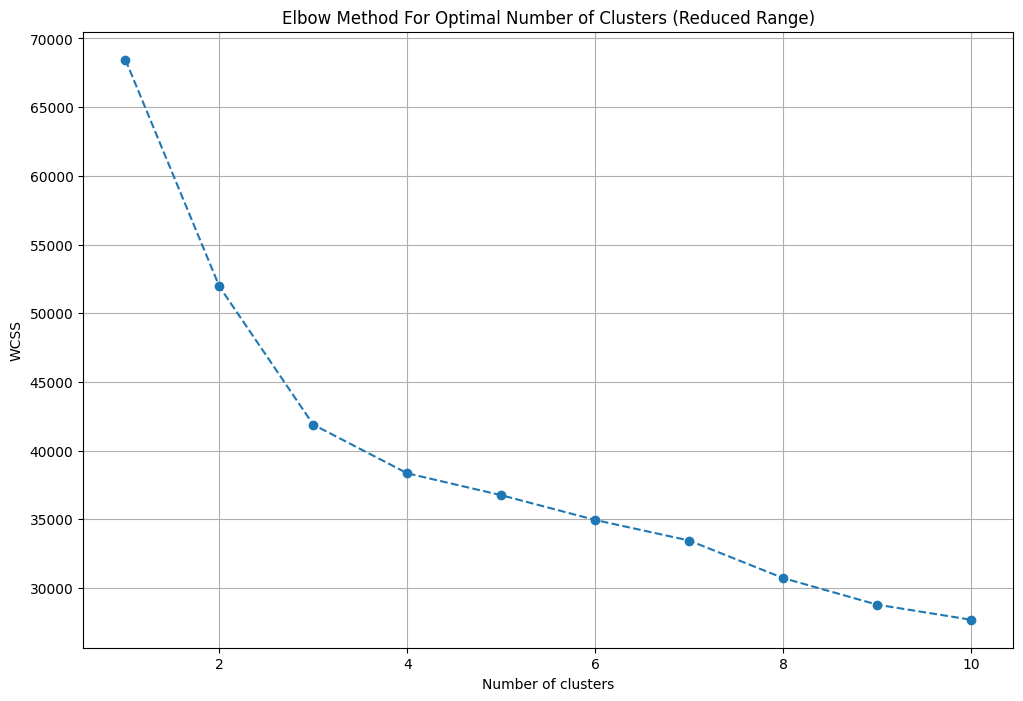

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishing_df)

# Now, Let's calcualte the within the cluster sum of squared distance or wcss.
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

# Plot the results.
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss_reduced, marker='o', linestyle='--')
plt.title("Elbow Method For Optimal Number of Clusters (Reduced Range)")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [141]:
# From the above kmeans clustering algorithms, we can conclude that there will be total of 3 clusters we can made.
n_clusters = 3

# Fit the KMeans model.
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predit the cluster assignments for each row.
cluster_assignments = kmeans.predict(scaled_data)

In [142]:
cleaned_properties = cleaned_properties.iloc[:,:-18]

cleaned_properties['furnishing_type'] = cluster_assignments

cleaned_properties.sample(5)[['furnishDetails', 'furnishing_type']]
# 0 -> unfurnished.
# 1 -> semifurnished.
# 2 -> furnished.

,furnishDetails,furnishing_type
2854,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2938,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '11 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3482,"['5 Wardrobe', '5 Fan', '11 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
993,[],1
2071,"['1 Stove', '4 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1


## **Features.**

In [143]:
cleaned_properties[['society', 'features']].sample(5)

,society,features
3266,godrej summit,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3295,signature global city 63a,NaN
1399,alpha corp gurgaonone,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff']"
2504,prasha apartments,"['Lift(s)', 'Maintenance Staff', 'Separate entry for servant room', 'Park', 'Piped-gas', 'Security Personnel']"
382,dlf the ultima,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [144]:
cleaned_properties['features'].isnull().sum()

635

In [153]:
# Now, Let's load the another apartments dataset.
import pandas as pd
apartments = pd.read_csv("/content/drive/MyDrive/DATASET_ML/appartments.csv")
apartments.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [154]:
# 'PropertyName' column.
apartments['PropertyName'] = apartments['PropertyName'].str.lower()

In [155]:
apartments['PropertyName'].head(10)

,PropertyName
0,smartworld one dxp
1,m3m crown
2,adani brahma samsara vilasa
3,sobha city
4,signature global city 93
5,whiteland the aspen
6,bestech altura
7,elan the presidential
8,signature global city 92
9,emaar digihomes


In [156]:
temp_cleaned_properties = cleaned_properties[cleaned_properties['features'].isnull()]
temp_cleaned_properties.shape

(635, 26)

In [157]:
# Merging the two datasets.. i.e.., apartments and cleaned_properties.
x = temp_cleaned_properties.merge(apartments, left_on='society', right_on='PropertyName', how='left')['TopFacilities']

In [158]:
cleaned_properties.loc[temp_cleaned_properties.index, 'features'] = x.values

In [159]:
cleaned_properties['features'].isnull().sum()

481

In [160]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [161]:
# Convert the string representation of lists in the 'features' column to actual lists
cleaned_properties['features_list'] = cleaned_properties['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(cleaned_properties['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [162]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2391,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2650,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
221,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2465,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [163]:
features_binary_df.shape

(3803, 130)

In [164]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

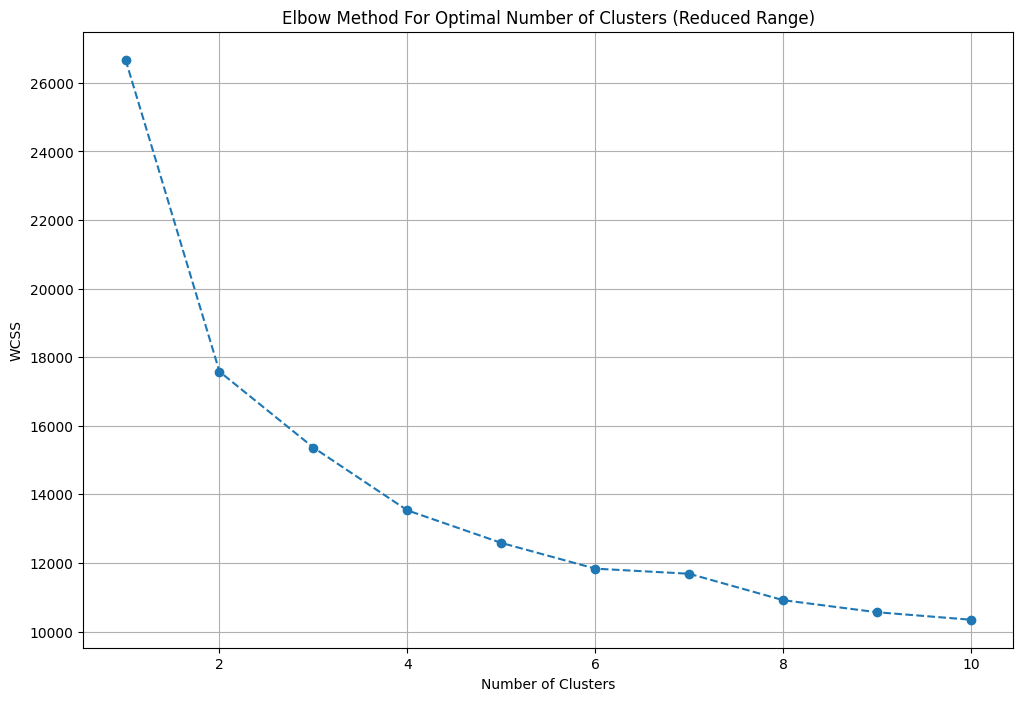

In [165]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [166]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [168]:
cleaned_properties['luxury_score'] = luxury_score

In [169]:
cleaned_properties.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0,1,"[Lift(s), Park]",8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,New Property,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0,1,1,0,0,0,1,"[Power Back-up, Intercom Facility, Lift(s), Swimming Pool, Park, Piped-gas, Internet/wi-fi connectivity, Fitness Centre / GYM, Club house / Community Center]",38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0,1,"[Intercom Facility, Lift(s), Park]",15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,not available,17.0,NaN,New Property,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,1000.0,585.0,0,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,"servant room,others",10.0,North-West,Relatively New,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', 'RPS International School Sector 89', 'DPG Institute of Technology', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Holiday Inn Sector 90', 'De Adventure Park', 'National Tennis Academy Sector 98']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'L

In [170]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
cleaned_properties.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [171]:
cleaned_properties.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3180,house,vatika india next,sector 82,6.50,20062.0,3240.0,Built Up area: 360 (301.01 sq.m.)Carpet area: 300 sq.yards (250.84 sq.m.),4,3,0,2.0,NaN,Undefined,NaN,360.0,300.0,0,0,0,0,0,1,0
144,flat,signature global park,sohna road,0.90,8035.0,1120.0,Super Built up area 1120(104.05 sq.m.),3,2,2,2.0,South,Under Construction,1120.0,NaN,NaN,0,0,0,0,0,1,144
2266,house,independent,sector 104,0.60,5128.0,1170.0,Plot area 130(108.7 sq.m.),7,3,1,2.0,North,Moderately Old,NaN,1170.0,NaN,0,0,0,0,0,1,0
1615,flat,shree vardhman flora,sector 90,0.65,4814.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,6.0,West,Relatively New,1350.0,NaN,NaN,1,0,0,0,0,1,174
3011,flat,sonata group housing gh 24,manesar,1.65,5892.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4,3,3,8.0,NaN,New Property,NaN,NaN,2800.0,0,1,0,0,0,1,20


In [172]:
cleaned_properties.shape

(3803, 23)

In [173]:
cleaned_properties.to_csv("gurgaon_properties_cleaned_v2.csv", index=False)